In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


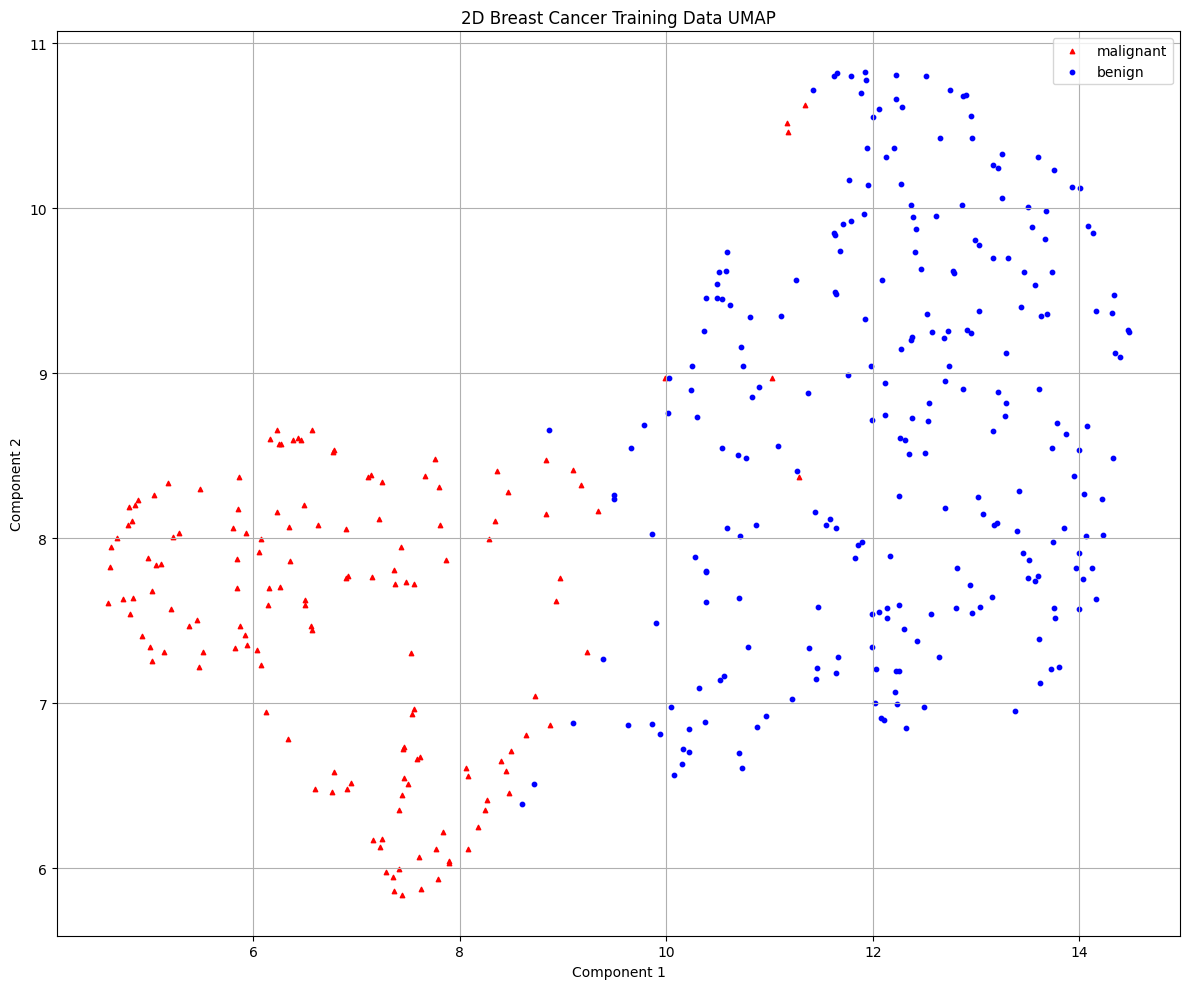

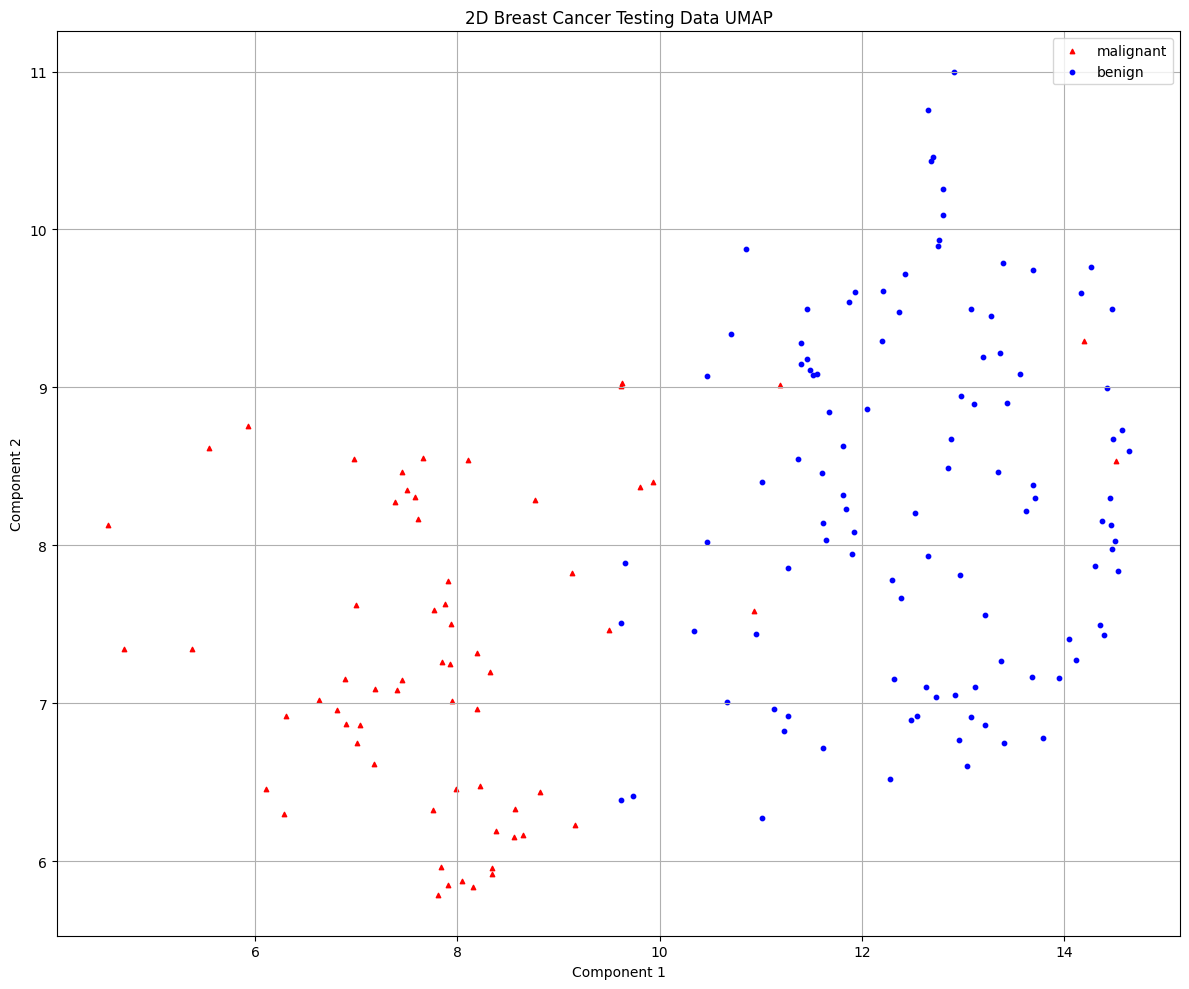

[I 2025-04-27 10:42:32,686] A new study created in memory with name: no-name-2e853651-4780-410e-88ef-ddb13003847d
[I 2025-04-27 10:42:35,328] Trial 0 finished with value: 0.9723417721518987 and parameters: {'n_estimators': 609, 'max_depth': 8, 'min_samples_split': 19, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.9723417721518987.
[I 2025-04-27 10:42:37,418] Trial 1 finished with value: 0.9698417721518988 and parameters: {'n_estimators': 498, 'max_depth': 18, 'min_samples_split': 17, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.9723417721518987.
[I 2025-04-27 10:42:38,939] Trial 2 finished with value: 0.9699367088607594 and parameters: {'n_estimators': 359, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.9723417721518987.
[I 2025-04-27 10:42:41,553] Trial 3 finished with value: 0.9748417721518987 and parameters: {'n_estimators': 662, 'max_depth': 30, 'min_samples_split': 19, 'min_samples_leaf': 5}. Best is trial 3 with va

Best trial:
Accuracy: 0.9749367088607596
Best hyperparameters:  {'n_estimators': 730, 'max_depth': 30, 'min_samples_split': 16, 'min_samples_leaf': 1}


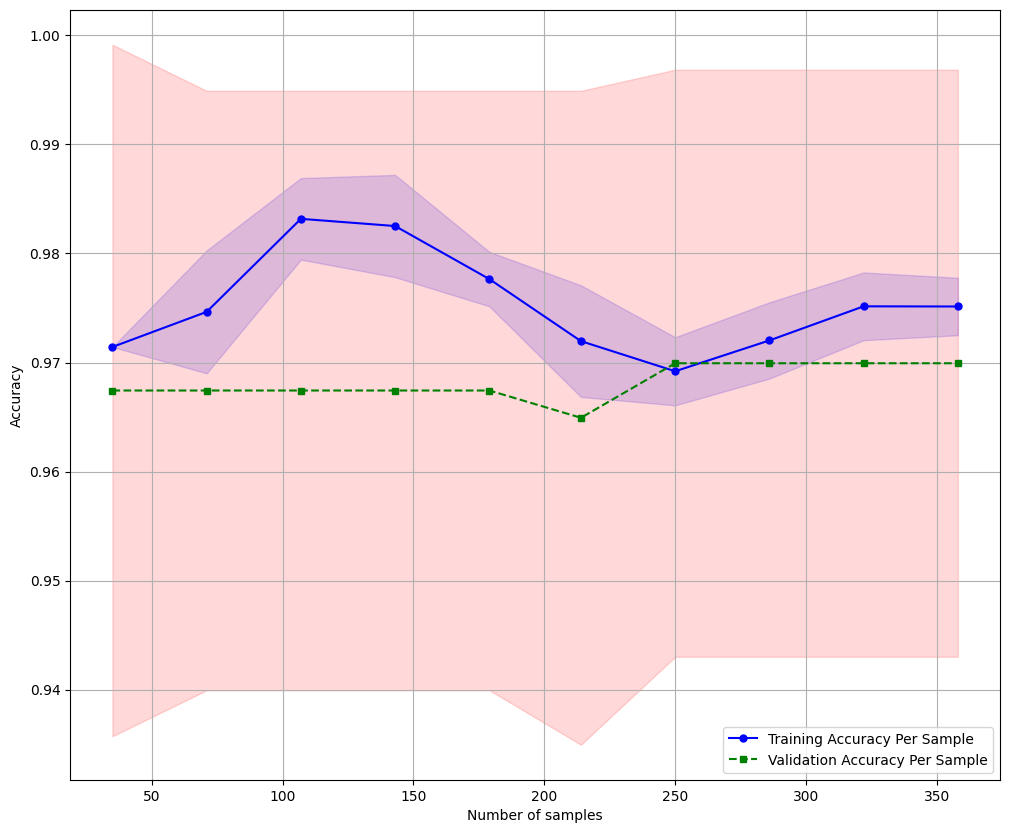

Confusion Matrix
[[ 55   9]
 [  0 107]]
Accuracy: 0.9474, Precision: 0.9224, Recall: 1.0000, F1: 0.9596, AUC: 0.9705


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(X_train_scaled, X_test_scaled, y_train, y_test, 'umap', {})

helper.train_and_evaluate_model('rf', X_train_feature_extracted, X_test_feature_extracted, y_train, y_test)